In [222]:
import pandas as pd # 데이터 분석 라이브러리
import numpy as np # 배열을 다루기 위한 라이브러리

# 시각화 도구들
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 경고 메세지 숨기기
import warnings
warnings.filterwarnings('ignore')

In [223]:
# train data를 판다스로 읽어오는데
# time을 기준으로 읽어옵니다
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

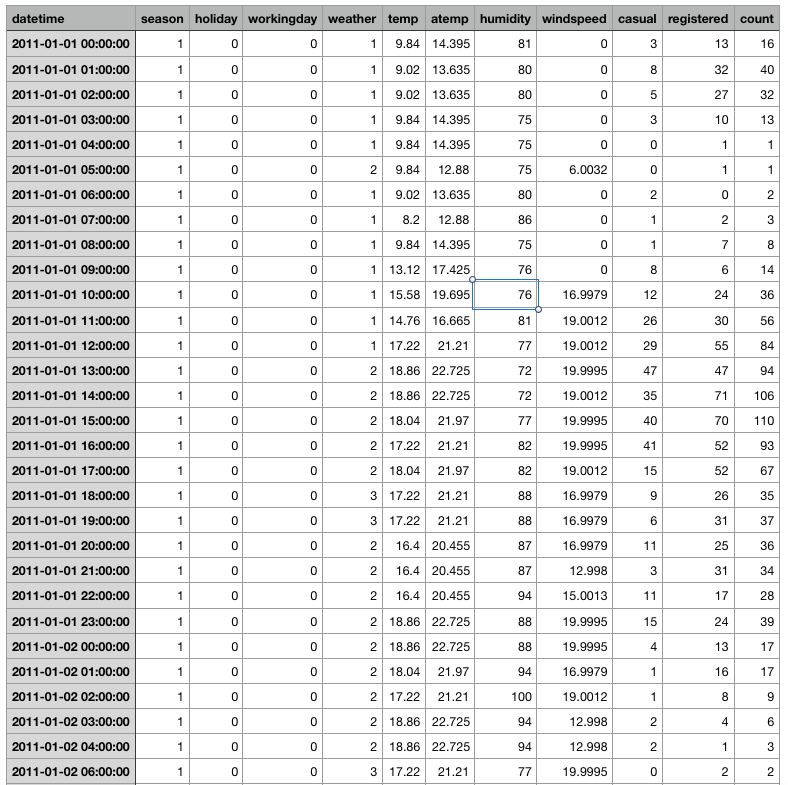




In [224]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

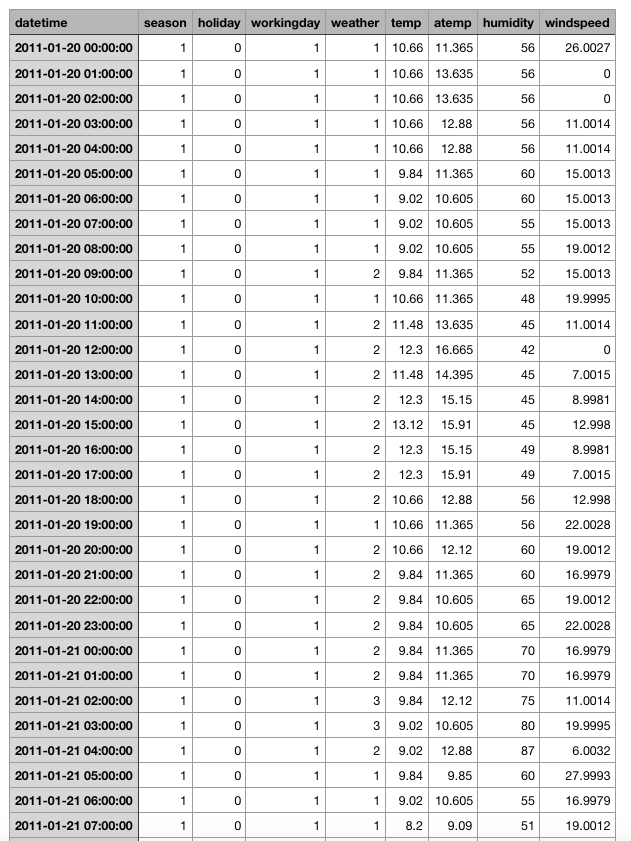 

In [225]:
# 시간대별로 새로 따와서 만듭니다.
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  dayofweek  
0       0       0          5  
1       0       0          5  
2       0       0          5  
3       0       0          5  
4       0       0          5

In [227]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  minute  second  dayofweek  
0        56    26.0027  2011      1   20     0       0       0          3  
1        56     0.0000  2011      1   20     1       0       0          3  
2        56     0.0000  2011      1   20     2       0       0          3  
3        56    11.0014  2011      1   20     3       0       0          3  
4        56    11.0014  2011      1   20     4       0       0          3

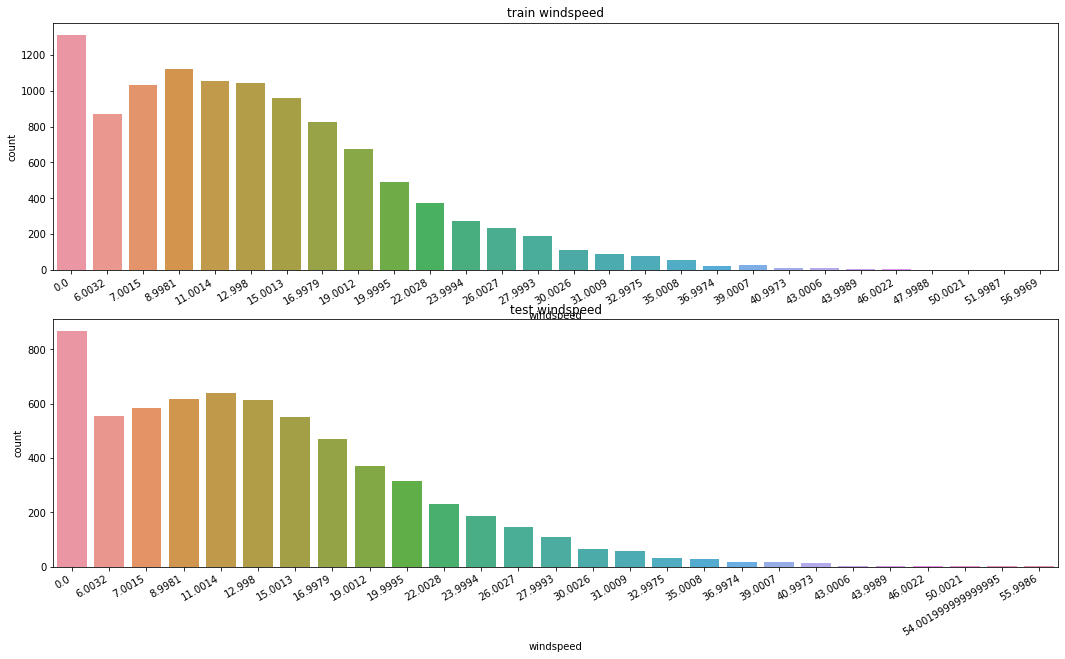

In [229]:
# 그래프를 그려줍니다(사이즈 정해주고)
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

# 첫번째 그래프
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

# 두번쨰 그래프
plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])


In [187]:
# windspeed 풍속에 0 값이 가장 많아서, 데이터를 고쳐줍니다.
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [188]:
# 그래서 머신러닝으로 예측을 해서 풍속을 넣습니다.
# RandomForest는 여러개의 결정 트리를 학습하는 앙상블 방법입니다.
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택한다.
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

In [189]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  dayofweek  
0       0       0          5  
1       0       0          5  
2       0       0          5  
3       0       0          5  
4       0       0          5

In [190]:
# 0값을 조정한다.
train = predict_windspeed(train)
train.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
1 2011-01-01 10:00:00       1        0           0        1  15.58  19.695   
2 2011-01-01 11:00:00       1        0           0        1  14.76  16.665   
3 2011-01-01 12:00:00       1        0           0        1  17.22  21.210   
4 2011-01-01 13:00:00       1        0           0        2  18.86  22.725   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        75     6.0032       0           1      1  2011      1    1     5   
1        76    16.9979      12          24     36  2011      1    1    10   
2        81    19.0012      26          30     56  2011      1    1    11   
3        77    19.0012      29          55     84  2011      1    1    12   
4        72    19.9995      47          47     94  2011      1    1    13   

   minute  second  dayofweek  
0       0       0          5  
1       0       0          5  
2       0       0          5  
3       0       0          5  
4       0       0          5

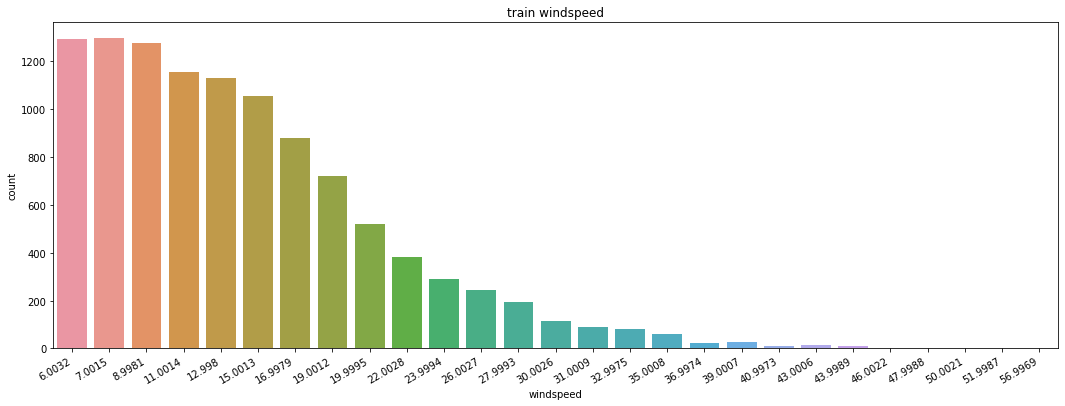

In [191]:
# widspeed 의 0값을 조정한 데이터를 시각화
# 0.0이 사라진 것을 볼 수 있습니다.
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

In [192]:
##### 여기부터
# Feature분류하기
# 연속되는것과 분류되는 것
# 연속(온도 1,2,3,4) 분류(계절 1,2,3,4)

categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

# 분류되는 것은 category타입으로 변경하기
for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [193]:
# feature들을 선택(학습할 것들)
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [194]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


season weather   temp   atemp  humidity  windspeed  year hour dayofweek  \
0      1       2   9.84  12.880        75     6.0032  2011    5         5   
1      1       1  15.58  19.695        76    16.9979  2011   10         5   
2      1       1  14.76  16.665        81    19.0012  2011   11         5   
3      1       1  17.22  21.210        77    19.0012  2011   12         5   
4      1       2  18.86  22.725        72    19.9995  2011   13         5   

  holiday workingday  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [195]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


season weather   temp   atemp  humidity  windspeed  year hour dayofweek  \
0      1       1  10.66  11.365        56    26.0027  2011    0         3   
1      1       1  10.66  13.635        56     0.0000  2011    1         3   
2      1       1  10.66  13.635        56     0.0000  2011    2         3   
3      1       1  10.66  12.880        56    11.0014  2011    3         3   
4      1       1  10.66  12.880        56    11.0014  2011    4         3   

  holiday workingday  
0       0          1  
1       0          1  
2       0          1  
3       0          1  
4       0          1

In [196]:
# train안에 있는 count 값
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [197]:
# 학습할 Model을 만들었고
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [198]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [199]:
# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.14,   5.2 ,   4.21,   3.64,   3.34,   6.39,  37.84, 106.24,
       236.82, 135.74])

[Text(0.5, 1.0, 'test')]

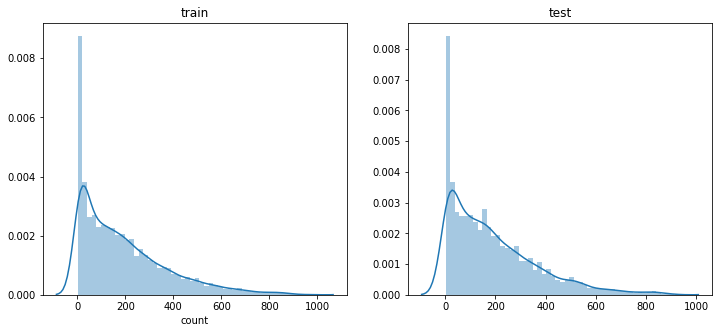

In [200]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [201]:
submission = pd.read_csv("data/sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


datetime  count
0  2011-01-20 00:00:00  12.14
1  2011-01-20 01:00:00   5.20
2  2011-01-20 02:00:00   4.21
3  2011-01-20 03:00:00   3.64
4  2011-01-20 04:00:00   3.34

In [202]:
submission.to_csv("data/result.csv", index=False)
